## Lab Assignment: Data Cleaning and Preparation
Student:     **MARY-ZITTA MUABE**

### Objective: To apply the techniques learned in class to clean and prepare data for analysis. Specifically, students will learn how to handle missing values, duplicates, and outliers in data. By the end of the lab assignment, students should be able to clean and prepare data for further analysis using Python.

### Instructions:
1. Download and import the "Adult Income" dataset from the UCI Machine Learning Repository.
2. Load the data into a DataFrame.
3. Explore the dataset and identify missing values, duplicates, and outliers.
4. Use appropriate techniques to handle missing values, duplicates, and outliers.
5. Perform basic data analysis on the cleaned dataset to answer the following questions.
6. Save the cleaned dataset to a CSV file for further analysis.

### Dataset
The "Adult Income" dataset contains information about individuals, including their age, education, work class, marital status, occupation, race, gender, native country, and income. The dataset contains 48,842 rows and 14 columns.

### Deliverable:
Modify this notebook to include the python code as well as any documentation related to your submission.  Submit the notebook as your response in Blackboard.

### Grading Criteria:

Your lab assignment will be graded based on the following criteria:

- Correctness of the implementation
- Proper use of basic control structures and functions
- Code efficiency
- Clarity and readability of the code
- Compliance with the instructions and deliverables.

### Student Submission
Download aind import the "Adult Income" dataset into a pandas dataframe

In [3]:
import pandas as pd

# Download dataset from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None)

# Assign column names to the DataFrame
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
           'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = columns

# Display the first five rows of the DataFrame
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Student Submission:

### Data  preperation 

In [4]:
# Number of rows and columns the dataset have
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")



Number of rows: 32561
Number of columns: 15


### Checking & removing missing values

In [5]:
# Checking missing values are there in each column?
print(f"Check for missing values: {df.isnull().sum()}")

# Handling missing values
print(f"There are no missing values in the Adult Income dataset, so no action was needed.")

Check for missing values: age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
There are no missing values in the Adult Income dataset, so no action was needed.


### Checking and removing duplicates

In [6]:
# Checking duplicates in the dataset?
print(f"Check for duplicates: {df.duplicated().sum()}")

# Removing the duplicate rows from the Dataset
print(f"Number of rows before removing duplicates values: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Check for duplicates: 24
Number of rows before removing duplicates values: 32561
Number of rows after removing duplicates: 32537


### Outlier detection and removal

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


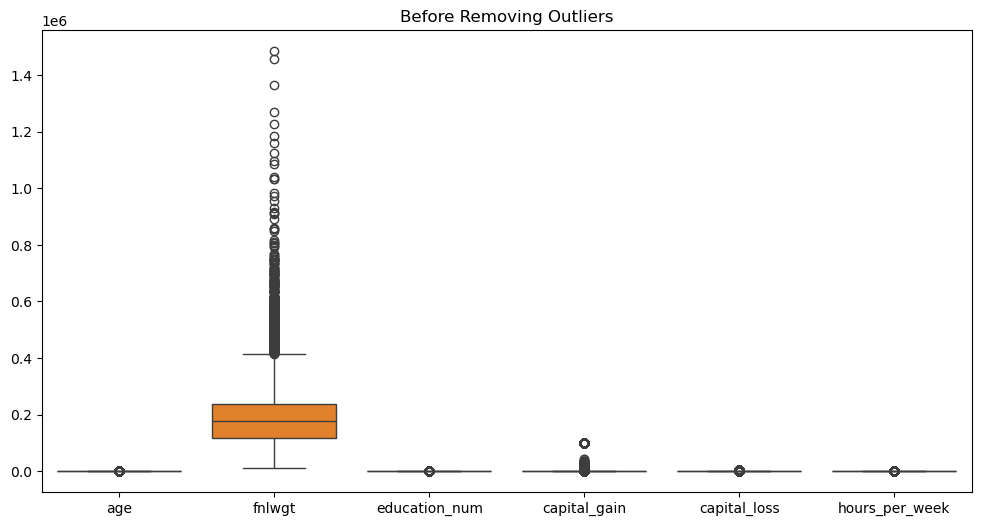

Number of outliers per numeric column:
 age                142
fnlwgt             993
education_num     1193
capital_gain      2712
capital_loss      1519
hours_per_week    9002
dtype: int64
Number of rows before removing outliers: (32537, 15)
Number of rows ater removing outliers: (18983, 15)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Selecting only numerical features for outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

# Detect outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Boxplots to visualize outliers before removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Before Removing Outliers")
plt.show()

# Upper and lower bounds for outliers
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

# Number of outliers per column
outlier_counts = outliers.sum()
print("Number of outliers per numeric column:\n", outlier_counts)

# Removing rows that are outliers
df_clean = df[~(outliers.any(axis=1))]

print("Number of rows before removing outliers:", df.shape)
print("Number of rows ater removing outliers:", df_clean.shape)




### Basic data analysis

In [15]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_clean, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:01<00:00, 10.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Saving cleaned Data

In [16]:
df_clean.to_csv('cleaned_adult_income.csv', index=False)
